In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [2]:
start = '2015-01-01'
end = '2020-12-31'

df = data.DataReader('TSLA','yahoo', start ,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,44.650002,42.652000,44.574001,43.862000,23822000.0,43.862000
2015-01-05,43.299999,41.431999,42.910000,42.018002,26842500.0,42.018002
2015-01-06,42.840000,40.841999,42.012001,42.256001,31309500.0,42.256001
2015-01-07,42.956001,41.956001,42.669998,42.189999,14842000.0,42.189999
2015-01-08,42.759998,42.001999,42.562000,42.124001,17212500.0,42.124001


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,666.090027,641.000000,642.98999,661.770020,22865600.0,661.770020
2020-12-28,681.400024,660.799988,674.51001,663.690002,32278600.0,663.690002
2020-12-29,669.900024,655.000000,661.00000,665.989990,22910800.0,665.989990
2020-12-30,696.599976,668.359985,672.00000,694.780029,42846000.0,694.780029
2020-12-31,718.719971,691.119995,699.98999,705.669983,49649900.0,705.669983


In [4]:
df = df.reset_index()

In [5]:
df =df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,44.650002,42.652000,44.574001,43.862000,23822000.0
1,43.299999,41.431999,42.910000,42.018002,26842500.0
2,42.840000,40.841999,42.012001,42.256001,31309500.0
3,42.956001,41.956001,42.669998,42.189999,14842000.0
4,42.759998,42.001999,42.562000,42.124001,17212500.0


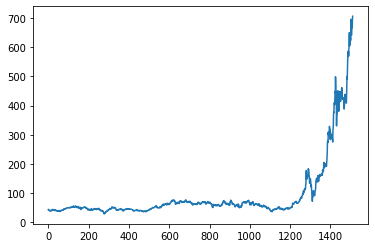

In [6]:
plt.plot(df.Close)

In [7]:
df.shape

(1511, 5)

In [25]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.7):len(df)])

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [27]:
data_training_array = scaler.fit_transform(data_training)
data_test_array = scaler.fit_transform(data_test)

In [28]:
x_train = []
y_train = []

for i in range(100 , data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train , y_train = np.array(x_train) , np.array(y_train)

In [29]:
from keras.layers import Dropout , Dense , LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units = 50 , activation='relu' , return_sequences=True , 
                input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 , activation='relu' , return_sequences=True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation='relu' , return_sequences=True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [31]:
model.compile(optimizer='adam' , loss='mean_squared_error')
model.fit(x_train , y_train, epochs = 50)

Epoch 1/50
30/30 [==============================] - 18s 355ms/step - loss: 0.0922
Epoch 2/50
30/30 [==============================] - 10s 334ms/step - loss: 0.0231
Epoch 3/50
30/30 [==============================] - 12s 412ms/step - loss: 0.0219
Epoch 4/50
30/30 [==============================] - 11s 358ms/step - loss: 0.0210
Epoch 5/50
30/30 [==============================] - 10s 330ms/step - loss: 0.0183
Epoch 6/50
30/30 [==============================] - 12s 388ms/step - loss: 0.0172
Epoch 7/50
30/30 [==============================] - 10s 339ms/step - loss: 0.0176
Epoch 8/50
30/30 [==============================] - 10s 350ms/step - loss: 0.0147
Epoch 9/50
30/30 [==============================] - 12s 403ms/step - loss: 0.0153
Epoch 10/50
30/30 [==============================] - 12s 385ms/step - loss: 0.0156
Epoch 11/50
30/30 [==============================] - 11s 371ms/step - loss: 0.0134
Epoch 12/50
30/30 [==============================] - 11s 369ms/step - loss: 0.0122
Epoch 13/50
3

In [39]:
model.save('keras_model.h5')

In [40]:
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_test , ignore_index=True)

In [41]:
final_df.head()

,Close
0,52.000000
1,52.189999
2,58.827999
3,57.700001
4,62.972000


In [43]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02419254],
       [0.02447617],
       [0.03438547],
       [0.03270158],
       [0.04057169],
       [0.04536064],
       [0.04653996],
       [0.04506208],
       [0.0472774 ],
       [0.04935541],
       [0.04999134],
       [0.04849554],
       [0.04839403],
       [0.05051384],
       [0.05148117],
       [0.05121545],
       [0.04547409],
       [0.04769839],
       [0.04927181],
       [0.05059743],
       [0.05234999],
       [0.0520992 ],
       [0.05031379],
       [0.04753716],
       [0.04384692],
       [0.04986893],
       [0.04924792],
       [0.05042724],
       [0.04842688],
       [0.0512065 ],
       [0.05359798],
       [0.05395925],
       [0.05496241],
       [0.05344273],
       [0.05558641],
       [0.05606709],
       [0.05601933],
       [0.05906168],
       [0.0557536 ],
       [0.05059145],
       [0.04719082],
       [0.04597866],
       [0.04072694],
       [0.04203763],
       [0.03475867],
       [0.04392455],
       [0.04095087],
       [0.046

In [44]:
input_data.shape

(554, 1)

In [45]:
x_test = []
y_test = []

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test , y_test = np.array(x_test) , np.array(y_test)

In [46]:
x_test.shape

(454, 100, 1)

In [47]:
y_predicted = model.predict(x_test)

In [48]:
y_predicted.shape

(454, 1)